<div>
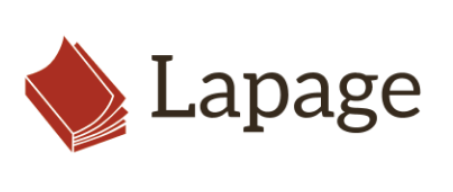
</div>


#                  Projet 6 : Analysez les ventes d'une librairie avec Python

### Sommaire

* [Nettoyage des fichiers](#chapter1)
* [Fichier 'customers.csv' ](#chapter5)
* [Fichier 'products.csv'](#chapter6)
* [Fichier 'transactions.csv'](#chapter7)
* [Jointure des fichiers](#chapter2)
* [Extraction de l'année et du mois de la colonne Datetime](#chapter3)
* [Discrétisation de l'âge](#chapter4)
    

# Nettoyage des fichiers <a class="anchor" id="chapter1"></a>

In [1]:
# Ouverture de la librairie Pandas
import pandas as pd

## Fichier 'customers.csv'<a class="anchor" id="chapter5"></a>

In [2]:
# Ouverture du fichier
customers = pd.read_csv('customers.csv')

In [3]:
# Aperçu de la dataframe
customers.describe(include = 'all')

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_5033,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


Ce fichier comprend 3 colonnes :  
* Client_id : référence de chaque client  
* Sex : le genre du client
* Birth : l'année de naissance du client

In [4]:
# Affichage des informations 
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [5]:
customers.isna().mean()

client_id    0.0
sex          0.0
birth        0.0
dtype: float64

In [6]:
customers.duplicated().sum()

0

Le fichier customers n'a pas de valeurs nulles ni de doublons.  

## Fichier 'products.csv' <a class="anchor" id="chapter6"></a>

In [7]:
# Ouverture du fichier
products = pd.read_csv('products.csv')

In [8]:
# Aperçu de la dataframe
products.describe(include = 'all')

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1727,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


Ce fichier comprend 3 colonnes :  
* id_prod : référence de chaque article
* Price : le prix de l'article
* Categ : la catégorie du produit (0, 1, 2)

In [9]:
# Affichage des informations 
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [10]:
products.isna().mean()

id_prod    0.0
price      0.0
categ      0.0
dtype: float64

In [11]:
products.duplicated().sum()

0

Le fichier products n'a pas de valeurs nulles ni de doublons.  


## Fichier 'transactions.csv'<a class="anchor" id="chapter7"></a> 

In [12]:
# Ouverture du fichier
transactions = pd.read_csv('transactions.csv')

In [13]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


Le fichier transactions compte 4 colonnes :  
* id_prod : la référence de chaque article
* date : la date à laquelle l'achat a été effectué
* session_id : la référence de la session d'achat
* client_id : la référence de chaque client

In [14]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [15]:
transactions.isna().mean()

id_prod       0.0
date          0.0
session_id    0.0
client_id     0.0
dtype: float64

In [16]:
transactions.describe()

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


On remarque dans la colonne date l'intitulé 'test_2021-03-01'.

In [17]:
transactions.sort_values('date', ascending = False)

,id_prod,date,session_id,client_id
246980,T_0,test_2021-03-01 02:30:02.237450,s_0,ct_0
573155,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
19312,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
392443,T_0,test_2021-03-01 02:30:02.237448,s_0,ct_0
...,...,...,...,...
439073,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
488300,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
462702,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
428477,0_1390,2021-03-01 00:02:26.047414,s_2,c_664


Il s'agit de sessions de test. Je les retire de ma dataframe et les enregistre à part. 

In [18]:
# Calcul du nombre de sessions test.
transactions.date.str.startswith('test').sum()

200

In [19]:
# Je conserve les sessions test dans une nouvelle dataframe
session_test = transactions.loc[transactions['id_prod']=='T_0',:]

In [20]:
# Je retire de mon fichier les doublons en utilisant ma liste session_test
transactions = transactions.drop(session_test.index)

In [21]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679332 non-null  object
 1   date        679332 non-null  object
 2   session_id  679332 non-null  object
 3   client_id   679332 non-null  object
dtypes: object(4)
memory usage: 25.9+ MB


In [22]:
transactions.duplicated().sum()

0

Mon fichier transactions n'a pas de valeurs manquantes ni de doublons.

# Jointure des fichiers <a class="anchor" id="chapter2"></a>

In [23]:
# Je prends mes fichiers transactions et products en prenant comme clé la colonne 'id_prod' avec une jointure externe à gauche
# afin de conserver toutes les lignes de mon fichier transactions.
df_final = pd.merge(transactions,products, on = 'id_prod', how= 'left')

In [24]:
df_final.head()

,id_prod,date,session_id,client_id,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0


In [25]:
df_final.isna().sum()

id_prod         0
date            0
session_id      0
client_id       0
price         221
categ         221
dtype: int64

On remarque que la dataframe contient 221 valeurs manquantes dans les colonnes price et catégorie

In [26]:
# Création d'une dataframe qui regroupe mes lignes dont le prix et la catégorie sont nuls.
ligne_nan = df_final[df_final['price'].isnull()]

In [27]:
# Aperçu
ligne_nan.head()

,id_prod,date,session_id,client_id,price,categ
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN


In [28]:
# Taille de la dataframe
ligne_nan.shape

(221, 6)

In [29]:
# Je vérifie si toutes les lignes ont le même id_prod
ligne_nan.id_prod.unique()

array(['0_2245'], dtype=object)

In [30]:
# Je recherche la référence dans ma dataframe
products.loc[products['id_prod']=='0_2245',:]

,id_prod,price,categ


la référence '0_2245' n'apparait pas dans le fichier 'products'.  


Il se pourrait qu'un bug ait effacé ces données mais comme cet article apparait dans 221 transactions, je décide de ne pas le supprimer.

In [31]:
products.groupby('categ').head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
5,0_1163,9.99,0
6,1_463,36.99,1
10,2_228,225.17,2
11,1_178,51.92,1
12,1_143,9.99,1


On remarque que l'id_prod commence par le numéro de la catégorie à laquelle il appartient.  
L'article '0_2245' appartient à la catégorie 0.  


In [32]:
# Je remplace les valeurs de ma colonne 'categ' par 0.
df_final['categ'].fillna(0,inplace=True)

In [33]:
# Je calcule la moyenne des prix de la catégorie 0.
df_final.loc[df_final['categ']==0]['price'].mean()

10.638188052306713

La moyenne des prix de la catégorie 0 est de 10.63€

In [34]:
# Je remplace mes valeurs nulles de la colonne 'price' par le prix moyen des produits de la catégorie 0.
df_final['price'].fillna(10.63,inplace=True)

In [35]:
df_final.loc[df_final['id_prod']=='0_2245',:]

,id_prod,date,session_id,client_id,price,categ
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,10.63,0.0
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,10.63,0.0
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,10.63,0.0
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,10.63,0.0
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,10.63,0.0
...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,10.63,0.0
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,10.63,0.0
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,10.63,0.0
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,10.63,0.0


In [36]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679332 non-null  object 
 1   date        679332 non-null  object 
 2   session_id  679332 non-null  object 
 3   client_id   679332 non-null  object 
 4   price       679332 non-null  float64
 5   categ       679332 non-null  float64
dtypes: float64(2), object(4)
memory usage: 36.3+ MB


Le fichier ne contient plus de valeurs manquantes, je peux à présent faire ma deuxième jointure.

In [37]:
# Je fais une jointure entre df_final et mon fichier customer en prenant comme clé la colonne 'client_id' 
# en conservant les lignes de mes 2 dataframes.
df_final = pd.merge(df_final, customers, on = 'client_id')

In [38]:
df_final.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,3.99,0.0,f,1986
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,13.21,0.0,f,1986
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,19.37,0.0,f,1986
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,8.99,0.0,f,1986


In [39]:
df_final.isna().mean()

id_prod       0.0
date          0.0
session_id    0.0
client_id     0.0
price         0.0
categ         0.0
sex           0.0
birth         0.0
dtype: float64

In [40]:
# Je remplace le type de ma colonne categ en nombre entier
df_final.categ = df_final.categ.astype('int64')

# Extraction de l'année et du mois de la colonne Datetime <a class="anchor" id="chapter3"></a>

In [41]:
# Modification du type de ma colonne date
df_final['date'] = pd.to_datetime(df_final['date'])

In [42]:
df_final['année'] = df_final['date'].dt.year
df_final['mois'] = df_final['date'].dt.month
df_final['jour'] = df_final['date'].dt.day

In [43]:
# Je vérifie que toutes mes données sont correctes
df_final["année"].nunique(), df_final["mois"].nunique(), df_final["jour"].nunique()

(3, 12, 31)

In [44]:
df_final

,id_prod,date,session_id,client_id,price,categ,sex,birth,année,mois,jour
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0,f,1986,2022,5,20
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,3.99,0,f,1986,2022,6,18
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,13.21,0,f,1986,2023,2,8
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,19.37,0,f,1986,2021,4,20
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,8.99,0,f,1986,2022,3,15
...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1509,2021-05-15 08:17:35.835342,s_34762,c_8114,4.99,0,m,1962,2021,5,15
679328,1_152,2021-11-08 17:12:27.637349,s_116675,c_240,11.06,1,m,1998,2021,11,8
679329,2_207,2021-06-01 04:31:16.088314,s_42418,c_305,50.99,2,f,1996,2021,6,1
679330,1_521,2022-10-18 00:38:49.629165,s_284060,c_305,22.99,1,f,1996,2022,10,18


# Discrétisation de l'âge <a class="anchor" id="chapter4"></a>

Je discrédite ma colonne âge afin de la transformer en variable qualitative catégorielle.
Afin d'avoir la meilleur répartition, je choisie la règle de Sturges :  

Sturges a proposé une valeur approximative pour le nombre k en fonction de la taille N de l'échantillon :  

**k = 1 + (10 ⁄ 3) × log(N)**

In [45]:
# Je crée une colonne âge
df_final['âge'] = 2023 - df_final['birth']

In [46]:
# Calcul du nombre d'observations (N) 
len(df_final.groupby(['âge', 'client_id']).count().reset_index())

8600

In [47]:
import math

In [48]:
# Formule de Huntsberger :  k = 1 + (10 ⁄ 3) × log(N)
1 + ((10/3) * math.log10(8596))

14.114321356064686

Je dois donc discréditer ma colonne Age en 14 intervalles.

In [49]:
df_final['âge'].describe()

count    679332.000000
mean         45.188861
std          13.574553
min          19.000000
25%          36.000000
50%          43.000000
75%          53.000000
max          94.000000
Name: âge, dtype: float64

In [50]:
# Je commence par indiquer la valeur min et max et le nombre d'intervalles.

x_sup = 94
x_inf = 19
n = 14

In [51]:
# Je calcule la tranche par intervalle
l  = (x_sup-x_inf)/n;
print(l)

5.357142857142857


In [52]:
# Je crée une boucle pour obtenir mes intervalles :
x = x_inf

for elem in range (1,n):
    x = x + l
    print(x)

24.357142857142858
29.714285714285715
35.07142857142857
40.42857142857142
45.78571428571428
51.14285714285713
56.499999999999986
61.85714285714284
67.2142857142857
72.57142857142856
77.92857142857142
83.28571428571428
88.64285714285714


In [53]:
# Je découpe ma colonne pour créer 14 intervalles d'âges :
labels = ['19-24','25-29','30-35','36-40','41-45','46-51','52-56','57-61','62-67','68-72','73-77','78-83','84-88','89-94']
df_final['âge_tranche']= pd.cut(df_final['âge'], 14,labels=labels)

In [54]:
df_final

,id_prod,date,session_id,client_id,price,categ,sex,birth,année,mois,jour,âge,âge_tranche
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0,f,1986,2022,5,20,37,36-40
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,3.99,0,f,1986,2022,6,18,37,36-40
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,13.21,0,f,1986,2023,2,8,37,36-40
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,19.37,0,f,1986,2021,4,20,37,36-40
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,8.99,0,f,1986,2022,3,15,37,36-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1509,2021-05-15 08:17:35.835342,s_34762,c_8114,4.99,0,m,1962,2021,5,15,61,57-61
679328,1_152,2021-11-08 17:12:27.637349,s_116675,c_240,11.06,1,m,1998,2021,11,8,25,25-29
679329,2_207,2021-06-01 04:31:16.088314,s_42418,c_305,50.99,2,f,1996,2021,6,1,27,25-29
679330,1_521,2022-10-18 00:38:49.629165,s_284060,c_305,22.99,1,f,1996,2022,10,18,27,25-29


In [55]:
# J'enregistre ma dataframe au format csv.
df_final.to_csv('df_p6_final.csv')  